In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ticker = ['ENV','BA','CNP','CMA', 'STZ','GPN','MPC','NEM', 'META'] # Наши бумаги

In [4]:
import yfinance as yf

In [5]:
data  = yf.download(ticker, '2017-01-01', '2019-01-31')['Adj Close']
data

[*********************100%%**********************]  9 of 9 completed


Ticker,BA,CMA,CNP,ENV,GPN,META,MPC,NEM,STZ
Date,,,,,,,,,
2017-01-03,145.533676,51.659439,19.397062,35.049999,68.348068,116.736145,41.570538,28.209162,139.353195
2017-01-04,147.063431,52.093933,19.570595,36.500000,70.897774,118.564201,40.243244,28.477962,142.270844
2017-01-05,147.146881,52.093933,19.570595,36.900002,71.178955,120.542099,40.094013,29.789452,132.149170
2017-01-06,147.508499,52.640789,20.004452,36.750000,72.177490,123.279205,39.559948,28.852669,134.571503
2017-01-09,146.785309,52.093933,19.625814,36.500000,77.354500,124.767624,38.845245,28.803802,135.318954
...,...,...,...,...,...,...,...,...,...
2019-01-24,348.129822,63.433067,25.718731,53.230000,108.892960,145.675446,52.307987,26.828241,151.939178
2019-01-25,353.891998,63.728138,25.436954,53.990002,109.863220,148.852066,53.111961,27.645264,153.792450
2019-01-28,352.696777,63.914486,25.496723,53.470001,108.330223,147.313705,52.813583,27.436836,154.806610


In [7]:
# Вычисляем доходность
stock_ret = data.pct_change()
print(stock_ret.round(4)*100)

Ticker        BA   CMA   CNP   ENV   GPN  META   MPC   NEM   STZ
Date                                                            
2017-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2017-01-04  1.05  0.84  0.89  4.14  3.73  1.57 -3.19  0.95  2.09
2017-01-05  0.06  0.00  0.00  1.10  0.40  1.67 -0.37  4.61 -7.11
2017-01-06  0.25  1.05  2.22 -0.41  1.40  2.27 -1.33 -3.14  1.83
2017-01-09 -0.49 -1.04 -1.89 -0.68  7.17  1.21 -1.81 -0.17  0.56
...          ...   ...   ...   ...   ...   ...   ...   ...   ...
2019-01-24 -0.09  0.69  0.84  0.68  0.85  1.06 -2.68 -0.06 -0.48
2019-01-25  1.66  0.47 -1.10  1.43  0.89  2.18  1.54  3.05  1.22
2019-01-28 -0.34  0.29  0.23 -0.96 -1.40 -1.03 -0.56 -0.75  0.66
2019-01-29  0.53 -0.36  0.57 -2.24 -0.85 -2.22  0.66  1.91  0.15
2019-01-30  6.25 -1.33  0.60  1.99  2.69  4.32  1.86  0.51  1.46

[522 rows x 9 columns]


In [8]:
# Средняя и ковариация для каждой катировки
avg_returns = stock_ret.mean()
covar_matrix = stock_ret.cov()
print(avg_returns)
print(covar_matrix)

Ticker
BA      0.001961
CMA     0.000484
CNP     0.000597
ENV     0.000991
GPN     0.001027
META    0.000666
MPC     0.000649
NEM     0.000132
STZ     0.000335
dtype: float64
Ticker        BA       CMA       CNP       ENV       GPN      META       MPC  \
Ticker                                                                         
BA      0.000269  0.000092  0.000028  0.000089  0.000105  0.000101  0.000109   
CMA     0.000092  0.000216  0.000009  0.000100  0.000072  0.000070  0.000092   
CNP     0.000028  0.000009  0.000099  0.000020  0.000021  0.000016  0.000019   
ENV     0.000089  0.000100  0.000020  0.000376  0.000119  0.000106  0.000091   
GPN     0.000105  0.000072  0.000021  0.000119  0.000217  0.000126  0.000084   
META    0.000101  0.000070  0.000016  0.000106  0.000126  0.000352  0.000078   
MPC     0.000109  0.000092  0.000019  0.000091  0.000084  0.000078  0.000283   
NEM     0.000022 -0.000016  0.000012  0.000010  0.000012  0.000020  0.000032   
STZ     0.000054  0.00002

In [9]:
ai_weights = np.array([0.1, 0.2, 0.15, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1])
# тут мы взяли веса, которые придумал нам chat gpt в Telegram
# доходность, стандартное отклонение и коэффициент Шарпо
ai_portfolio_return = np.sum(avg_returns * ai_weights)
ai_portfolio_std_dev = np.sqrt(np.dot(ai_weights.T,np.dot(covar_matrix, ai_weights)))
ai_sharpe_ratio = ai_portfolio_return/ai_portfolio_std_dev

# объединим полученные значения в таблицу и выведем ее
ai_results = np.array([ai_portfolio_return, ai_portfolio_std_dev, ai_sharpe_ratio])
ai_results = np.concatenate((ai_results, ai_weights), axis=0)
ai_sim_results = pd.DataFrame(ai_results, columns=['AI'], index=['ret','stdev','sharpe',ticker[0],ticker[1],ticker[2],ticker[3],ticker[4],ticker[5],ticker[6],ticker[7],ticker[8]])

print(ai_sim_results)

              AI
ret     0.000713
stdev   0.008421
sharpe  0.084642
ENV     0.100000
BA      0.200000
CNP     0.150000
CMA     0.050000
STZ     0.100000
GPN     0.100000
MPC     0.100000
NEM     0.100000
META    0.100000


In [10]:
num_trials = 1000000
sim_results = np.zeros((4+len(ticker)-1,num_trials))

for i in range(num_trials):
    random_weights = np.array(np.random.random(9))
    random_weights /= np.sum(random_weights)

    portfolio_return = np.sum(avg_returns * random_weights)
    portfolio_std_dev = np.sqrt(np.dot(random_weights.T,np.dot(covar_matrix, random_weights)))

    sim_results[0,i] = portfolio_return
    sim_results[1,i] = portfolio_std_dev

    sim_results[2,i] = sim_results[0,i] / sim_results[1,i]

    for j in range(len(random_weights)):
            sim_results[j+3,i] = random_weights[j]

sim_dataframe = pd.DataFrame(sim_results.T,columns=['ret','stdev','sharpe',ticker[0],ticker[1],ticker[2],ticker[3],ticker[4],ticker[5],ticker[6],ticker[7],ticker[8]])

In [11]:
sim_dataframe

,ret,stdev,sharpe,ENV,BA,CNP,CMA,STZ,GPN,MPC,NEM,META
0,0.000692,0.009064,0.076398,0.011461,0.078130,0.150087,0.176322,0.177617,0.031191,0.162099,0.057918,0.155175
1,0.000767,0.009687,0.079163,0.071889,0.145354,0.095106,0.111694,0.141961,0.139600,0.163142,0.001854,0.129401
2,0.000794,0.009242,0.085869,0.093856,0.212621,0.174019,0.131286,0.114840,0.068871,0.131615,0.004386,0.068507
3,0.000811,0.008824,0.091925,0.127273,0.100518,0.139471,0.118858,0.141822,0.043750,0.147723,0.094436,0.086150
4,0.000828,0.009287,0.089151,0.122577,0.025630,0.176890,0.234172,0.053052,0.097921,0.137623,0.109328,0.042808
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.000729,0.009085,0.080236,0.042138,0.051251,0.140257,0.155344,0.173131,0.046795,0.206807,0.102838,0.081440
999996,0.000727,0.008496,0.085628,0.116270,0.061920,0.155583,0.132631,0.034681,0.117310,0.116360,0.161082,0.104163
999997,0.000714,0.008808,0.081047,0.047862,0.064089,0.147882,0.140792,0.158814,0.094513,0.108850,0.072794,0.164405
999998,0.000779,0.010181,0.076535,0.047927,0.217192,0.067152,0.225082,0.173150,0.056301,0.119378,0.035429,0.058388


In [12]:
max_sharpe_ratio = sim_dataframe.iloc[sim_dataframe['sharpe'].idxmax()]

min_risk = sim_dataframe.iloc[sim_dataframe['stdev'].idxmin()]

print ("Портфель с максимальным коэффициентом шарпа :\n", max_sharpe_ratio)
print ("Портфель с минимальным риком:\n", min_risk)

Портфель с максимальным коэффициентом шарпа :
 ret       0.001201
stdev     0.009682
sharpe    0.124027
ENV       0.429366
BA        0.013424
CNP       0.296684
CMA       0.026019
STZ       0.106233
GPN       0.012442
MPC       0.012885
NEM       0.052314
META      0.050633
Name: 409475, dtype: float64
Портфель с минимальным риком:
 ret       0.000497
stdev     0.007136
sharpe    0.069688
ENV       0.006809
BA        0.182186
CNP       0.445747
CMA       0.005163
STZ       0.021530
GPN       0.014127
MPC       0.058558
NEM       0.166790
META      0.099090
Name: 575011, dtype: float64


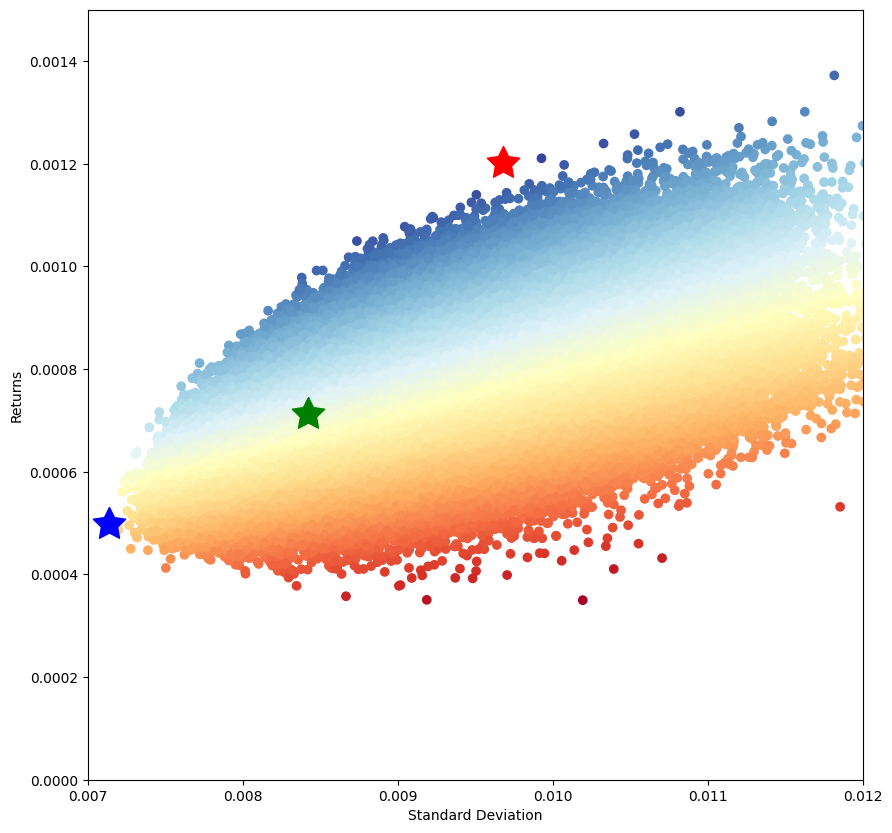

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create a scatter plot with different colors for different Sharpe ratios on the x-axis and standard deviations on the y-axis
plt.scatter(sim_dataframe.stdev,sim_dataframe.ret,c=sim_dataframe.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.ylim(0,.0015)
plt.xlim(0.007,0.012)

plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker=(5,1,0),color='r',s=600)
plt.scatter(min_risk[1],min_risk[0],marker=(5,1,0),color='b',s=600)
plt.scatter(ai_portfolio_std_dev, ai_portfolio_return,marker=(5,1,0),color='g',s=600)

plt.show()

In [23]:

max_sharpe_ratio[3:]

ENV     0.429366
BA      0.013424
CNP     0.296684
CMA     0.026019
STZ     0.106233
GPN     0.012442
MPC     0.012885
NEM     0.052314
META    0.050633
Name: 409475, dtype: float64

In [26]:
# Допустим у нас есть 10 000 долларов, тогда наш портфель будет выглядеть таким образом:
import math
prices = data.iloc[-1]
print(prices)

# Распределение 10 000 долларов
total_investment = 10000
investments_max_sharpe = {}
sum_bucks = {}
for ticker, weight in pd.Series(max_sharpe_ratio[3:]).items():
    investment = math.floor((total_investment * weight) / prices[ticker])
    sum_bucks[ticker] = investment * prices[ticker]
    investments_max_sharpe[ticker] = investment

# Вычисление оставшегося баланса
remaining_balance = total_investment - sum(sum_bucks.values())

print("Распределение средств для максимального коэффициента Шарпа:")
print(f"Тикер   кол-во акций  суммарная стоимсоть")
for ticker, investment in investments_max_sharpe.items():

    print(f"{ticker}: {investment:.2f}, {sum_bucks[ticker]:.2f}")

print(f"Оставшийся баланс: {remaining_balance:.2f} долларов")

Ticker
BA      376.746307
CMA      62.835163
CNP      25.795578
ENV      53.310001
GPN     110.299866
META    150.260574
MPC      54.148010
NEM      28.103794
STZ     157.305283
Name: 2019-01-30 00:00:00, dtype: float64
Распределение средств для максимального коэффициента Шарпа:
Тикер   кол-во акций  суммарная стоимсоть
ENV: 80.00, 4264.80
BA: 0.00, 0.00
CNP: 115.00, 2966.49
CMA: 4.00, 251.34
STZ: 6.00, 943.83
GPN: 1.00, 110.30
MPC: 2.00, 108.30
NEM: 18.00, 505.87
META: 3.00, 450.78
Оставшийся баланс: 398.29 долларов
